There are three random variables that can be used to describe the Poisson process. 

$X_{i}$ - denotes the inter-arrival time, time between the $(i-1)^{st}$ and $i^{th}$ arrival

$T_{n}$ - denotes the time of the $n^{th}$ arrival

The above two random variables are associated with each other as follows: 

$$T_n = \sum_{i=1}^{n} X_i, \ \ n \in \mathbb{N} $$

$(T$ is the partical sum process associated with $X)$

$$X_n = T_n - T{n-1}, \ \ n \in \mathbb{N}_{+} $$

$N_{t}$ - denote the number of arrivals in $(0,t]$ for $t\in[0,\inf]$, it is the counting process. 

The counting process $N$ and the arrival time process $T$ are inverses of one another

$$T_n = \min\{t \geq 0 : N_t = n\}, \ \ n \in \mathbb{N} $$
$$N_t = \max\{n \in \mathbb{N} : T_n \leq t\}, \ \ t \in [0,\inf) $$


In [1]:
set(0,'defaulttextInterpreter','latex') 

Running an experiment where events occur according to an underlying uniformly and identically distributied random number, with probability $p$. 

In [2]:
%%file coinflip.m

function y=coinflip(t,p,repeat)

% Running an experiment where events occur according to an underlying uniformly 
% distributied random number, such that the probability of occurence is $p$. 
%
% Input: 
% t      - is the time
% p      - is the probability that an event occurs at this time instant
% repeat - repeat the experiment 'repeat' number of times
%          [default: 1]
% Output: 
% y       - is a [TxRepeat] matrix showing the status of the event (success/failure) 
%           at each time instant (row), for each experiment (column)

    if nargin < 3
        repeat = 1;
    end
        
    n = length(t);
    y = zeros(n,repeat);
    x = rand(n,repeat);
    y(x<p) = 1;
end

Created file 'C:\Users\nithin\Documents\GitHub\energy-height-conversion\Tools\Routines\FHI\coinflip.m'.


Defining $r$ as the success rate,
         $p$ as the probability of success per trial,       
         $nTrial$ as the number of trials,
         $maxt$ as the maximum time of the simulation,
         $repeat$ or $nExp$ as the number of re-runs to increase the statistics.


In [3]:
nTrial = 2000;
maxt = nTrial/5;
t = linspace(0,maxt,nTrial);

r = 0.1; % success rate - 1 success per second (probability of success per second)
p = r*max(t)/nTrial; % Probability of success per trial

repeat = 10000;
y = coinflip(t,p,repeat);

In [4]:
interArrivalTimes = [];
for i=1:1:size(y,2)
    yi = y(:,i);
    eventTimes = t(yi>0);
    interArrivalTimes = [interArrivalTimes, diff(eventTimes)];
end


Generate the random number $N_t$, number of arrivals in time $\max(t)$ and plot the probability density function of $N_t$, which is a function of the number of successes $n$ within $\max(t)$

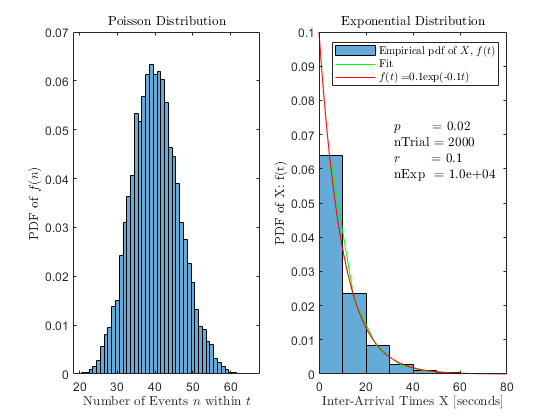

In [5]:
N = sum(y,1);
%plot inline
figure;
subplot(1,2,1)
Nh = histogram(N,'Normalization','pdf');
xlabel('Number of Events $n$ within $t$');
ylabel('PDF of $f(n)$');
title('Poisson Distribution');

% Maximum inter-arrival time resolution
dt = 1./r;

subplot(1,2,2)
Xh =  histogram(interArrivalTimes,'Normalization','pdf','BinEdges',0:dt:maxt);
Xy = Xh.Values;
Xx =  Xh.BinEdges(1:end-1)+Xh.BinWidth/2;
s
f_exp = @(r,t) r.*exp(-r.*t);
hold on;
plot(t,f_exp(r,t),'r');
xlim([0 maxt/5]);
legend('Empirical pdf of $X$, $f(t)$','Fit',['$f(t) =$',num2str(r),'exp(-',num2str(r),'$t$)'],'Interpreter','latex');
text(0.4,0.65,{['$p$ \ \ \ \ \ \  = ',num2str(p)],['nTrial = ',num2str(length(t))],...
['$r \ \ \ \ \ \  = \ $',num2str(r)], ['nExp \ = ',num2str(repeat,'%10.1e\n')]},'Units','normalized'); 

xlabel('Inter-Arrival Times X [seconds]');
ylabel('PDF of X: f(t)');
title('Exponential Distribution');

In [6]:
pdf_exp = fitdist(interArrivalTimes','Exponential');
disp(['mean of inter arrival times: ',num2str(pdf_exp.mean)]);
disp(['1/r = ',num2str(1/r)]);
disp(['median of inter arrival times: ',num2str(pdf_exp.median)]);

mean of inter arrival times: 9.7462
1/r = 10
median of inter arrival times: 6.7555



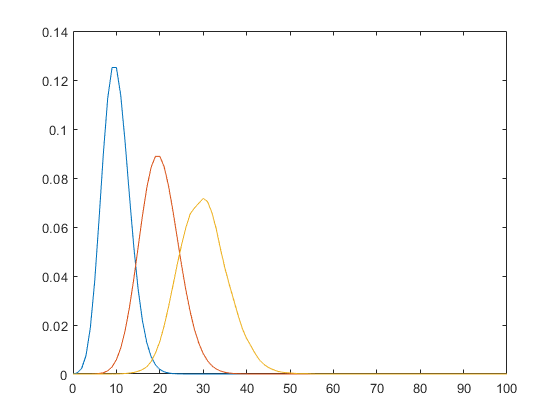

In [9]:
% Example of convolving distributions
dist1 = makedist('poisson',10);
dist2 = makedist('poisson',20);
convolvedDistribution = fitdist(random(dist1,[10000,1])+random(dist2,[10000,1]),'kernel');
x = 0:1:100;
plot(x,pdf(dist1,x));
hold on;
plot(x,pdf(dist2,x));
hold on;
plot(x,pdf(convolvedDistribution,x));


In [8]:
convolvedDistribution.median


ans =

   24.7803


